In [1]:
import os
from mtcnn.mtcnn import MTCNN
import cv2
from PIL import Image
import numpy as np
import tensorflow as tf
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.models import load_model
import matplotlib.pyplot as plt
import random

Using TensorFlow backend.


In [52]:
def facemaskdetector(filename=None):
    if filename==None:
        return "File Not Found"
    try:
        img = cv2.imread(filename)
    except:
        return "File Not Found/File not an image"
    # If using a GPU, please uncomment the below 2 lines
    
#     physical_devices = tf.config.experimental.list_physical_devices('GPU')
#     tf.config.experimental.set_memory_growth(physical_devices[0], True)

    labelfinder = {0:'mask',1:'No Mask'}
    detector = MTCNN()
    try:
        model = load_model('curr_best_model.h5')
    except:
        return "Model file is corrupted/Not found"
    try:
        faces = detector.detect_faces(img)
    except:
        return "File not an jpeg/jpg"
    newimg = img[:]
    #newimg = cv2.cvtColor(newimg,cv2.COLOR_BGR2RGB)
    for face in faces:
        curr_box = (face['box'])
        x=curr_box[0]
        y=curr_box[1]
        h=curr_box[2]
        w=curr_box[3]
        im1 = img[y:y+h,x:x+w]
        
        im1 = cv2.cvtColor(im1,cv2.COLOR_BGR2RGB)
        #print(x,y,h,w)
#         plt.imshow(im1)
#         plt.show()
        im1 = cv2.resize(im1,(64,64))
        im1 = np.asarray(im1)
        im1 = preprocess_input(im1)
        a = []
        a.append(im1)
        a = np.array(a)
        pred = model.predict(a)
        predLabel = labelfinder[np.argmax(pred)]
        #print(x,y,w,h)
        color = (random.randint(0,255),random.randint(0,255),random.randint(0,255))
        newimg = cv2.rectangle(newimg, (x, y), (x + w, y + h), (color), 6)
        if(y-10>=0):
            cv2.putText(newimg, predLabel, (x, y-10), cv2.FONT_HERSHEY_SIMPLEX, 2, (color), 5)
        else:
            cv2.putText(newimg, predLabel, (x, y), cv2.FONT_HERSHEY_SIMPLEX, 2, (color), 5)

#         plt.imshow(newimg)
#         plt.show()
        #print("work")
#           faces.append([predLabel,x,y,x+h,y+w])
#           print(pred)
#           cnt+=1
#         except:
#             print("File not a jpeg/jpg")
    newimg = cv2.cvtColor(newimg,cv2.COLOR_BGR2RGB)
    return newimg

In [53]:
facemaskdetector('/home/insanenerd/practice/face_mask/covid-19__face_mask_detection-dataset/COVID-19/training/images/1_Handshaking_Handshaking_1_35.jpg')

array([[[ 57,  23,  11],
        [ 57,  21,   9],
        [ 57,  16,  10],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[ 56,  22,  10],
        [ 55,  19,   7],
        [ 56,  16,   8],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[ 53,  20,   5],
        [ 52,  16,   4],
        [ 54,  14,   6],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[184, 190, 188],
        [184, 190, 188],
        [184, 190, 188],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[182, 188, 186],
        [182, 188, 186],
        [182, 188, 186],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[181, 187, 185],
        [181, 187, 185],
        [181, 187, 185],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]

In [40]:
def convolution(img,img_filter):
    W = img.shape[0]
    H = img.shape[1]
    
    F = img_filter.shape[0]
    new_img = np.zeros((W-F+1,H-F+1))
    
    for row in range(W-F+1):
        for col in range(H-F+1):
            for i in range(F):
                for j in range(F):
                    new_img[row][col] += img[row+i][col+j]*img_filter[i][j]
                    
                if new_img[row][col]>255:
                    new_img[row][col] = 255
                    
                elif new_img[row][col] < 0:
                    new_img[row][col] = 0
    return new_img

In [77]:
def edgeDetector(filename=None):
    if filename==None:
        return "File Not Found"
    try:
        img = cv2.imread(filename)
    except:
        return "File Not Found/File not an image"
    edge_filter = np.array((
    [3,0,-3],
    [3,0,-3],
    [3,0,-3]
))
    img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
    img = cv2.cvtColor(img,cv2.COLOR_RGB2GRAY)
    img = cv2.fastNlMeansDenoising(img)
    img = cv2.resize(img,(224,224))
    #output2 = convolution(img,edge_filter)
    edges = cv2.Canny(img,70,150)
    return edges
    

In [78]:
edgeDetector('/home/insanenerd/practice/face_mask/covid-19__face_mask_detection-dataset/COVID-19/training/images/1_Handshaking_Handshaking_1_35.jpg')

[[  0   0 255 ...   0   0   0]
 [  0   0 255 ...   0   0   0]
 [  0   0 255 ...   0   0   0]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]


array([[  0,   0, 255, ...,   0,   0,   0],
       [  0,   0, 255, ...,   0,   0,   0],
       [  0,   0, 255, ...,   0,   0,   0],
       ...,
       [  0,   0,   0, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0]], dtype=uint8)

In [4]:
def drawImg(img, title = 'Image'):
    plt.imshow(img)
    plt.axis("off")
    plt.style.use('seaborn')
    plt.title(title + str(img.shape))
    plt.show()

In [85]:
def BlurFilterConvolution(filename=None,x=10):
    if filename==None:
        return "File Not Found"
    try:
        img = cv2.imread(filename)
    except:
        return "File Not Found/File not an image"
    blur_filter = np.ones((x,x))/(x*x)
    img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
    img = cv2.cvtColor(img,cv2.COLOR_RGB2GRAY)
    img = cv2.resize(img,(224,224))
    output = convolution(img,blur_filter)
    drawImg(output)

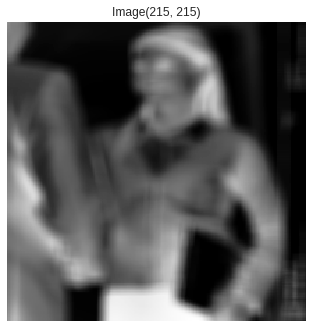

In [86]:
BlurFilterConvolution('/home/insanenerd/practice/face_mask/covid-19__face_mask_detection-dataset/COVID-19/training/images/1_Handshaking_Handshaking_1_35.jpg')

In [95]:
def BlurFilterGaussian(filename=None,x=5):
    if filename==None:
        return "File Not Found"
    try:
        img = cv2.imread(filename)
    except:
        return "File Not Found/File not an image"
#     blur_filter = np.ones((x,x))/(x*x)
#     img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
#     img = cv2.cvtColor(img,cv2.COLOR_RGB2GRAY)
    img = cv2.resize(img,(224,224))
    x=2*x-1
    output = cv2.GaussianBlur(img,(x,x),cv2.BORDER_DEFAULT)
#     output = convolution(img,blur_filter)
    drawImg(output)

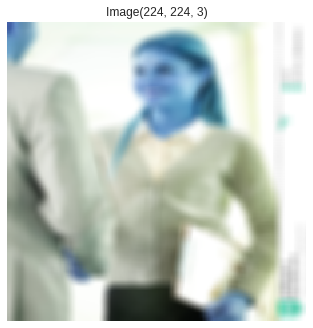

In [96]:
BlurFilterGaussian('/home/insanenerd/practice/face_mask/covid-19__face_mask_detection-dataset/COVID-19/training/images/1_Handshaking_Handshaking_1_35.jpg')

In [2]:
def FaceDetection(filename = None):
    if filename==None:
        return "File Not Found"
    try:
        img = cv2.imread(filename)
    except:
        return "File Not Found/File not an image"
        # If using a GPU, please uncomment the below 2 lines
    
    physical_devices = tf.config.experimental.list_physical_devices('GPU')
    tf.config.experimental.set_memory_growth(physical_devices[0], True)
    detector = MTCNN()
    try:
        faces = detector.detect_faces(img)
    except:
        return "File not an jpeg/jpg"
    newimg = img[:]
    for face in faces:
        curr_box = (face['box'])
        x=curr_box[0]
        y=curr_box[1]
        h=curr_box[2]
        w=curr_box[3]
        color = (random.randint(0,255),random.randint(0,255),random.randint(0,255))
        newimg = cv2.rectangle(newimg, (x, y), (x + w, y + h), (color), 6)
    drawImg(newimg)

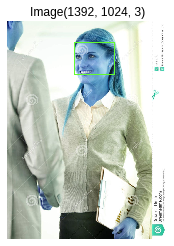

In [5]:
FaceDetection('/home/insanenerd/practice/face_mask/covid-19__face_mask_detection-dataset/COVID-19/training/images/1_Handshaking_Handshaking_1_35.jpg')

In [17]:
def cartooning(filename=None):
    if filename==None:
        return "File Not Found"
    try:
        img_rgb = cv2.imread(filename)
    except:
        return "File Not Found/File not an image"
    # downsample image using Gaussian pyramid
    try:
        num_down = 2 # number of downsampling steps
        num_bilateral = 7 # number of bilateral filtering steps
        img_color = img_rgb
        for _ in range(num_down):
            img_color = cv2.pyrDown(img_color)
        for _ in range(num_bilateral):
            img_color = cv2.bilateralFilter(img_color, d=9, sigmaColor=9, sigmaSpace=7)

        for _ in range(num_down):
            img_color = cv2.pyrUp(img_color)

        img_gray = cv2.cvtColor(img_rgb, cv2.COLOR_RGB2GRAY)
        img_blur = cv2.medianBlur(img_gray, 7)

        img_edge = cv2.adaptiveThreshold(img_blur, 255,
           cv2.ADAPTIVE_THRESH_MEAN_C,
           cv2.THRESH_BINARY,
           blockSize=9,
           C=2)

        img_edge = cv2.cvtColor(img_edge, cv2.COLOR_GRAY2RGB)
        img_cartoon = cv2.bitwise_and(img_color, img_edge)
        return img_cartoon
    except:
        print("Please add correct image in RGB color in .jpg format")

In [18]:
cartooning('/home/insanenerd/practice/face_mask/covid-19__face_mask_detection-dataset/COVID-19/training/images/1_Handshaking_Handshaking_1_35.jpg')

array([[[  8,  18,  70],
        [  8,  18,  70],
        [  9,  19,  71],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[  8,  18,  70],
        [  8,  18,  70],
        [  0,   0,   0],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[  8,  18,  70],
        [  8,  18,  70],
        [  0,   0,   0],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[188, 191, 182],
        [188, 191, 182],
        [188, 191, 182],
        ...,
        [254, 255, 255],
        [254, 255, 255],
        [254, 255, 255]],

       [[188, 191, 182],
        [188, 191, 182],
        [188, 191, 182],
        ...,
        [254, 255, 255],
        [254, 255, 255],
        [254, 255, 255]],

       [[188, 191, 182],
        [188, 191, 182],
        [188, 191, 182],
        ...,
        [254, 255, 255],
        [254, 255, 255],
        [254, 255, 255]]